In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.86643556105855 69.09598531580764
47.30411357773835 115.84198394920304
68.2898174786065 41.15960675706802
-60.53209830035311 -55.32231051496201
-64.12712861397799 -1.1142468308741513
86.36867134827114 147.62998689967884
-29.13684258816469 7.73038353811134
71.00582745752678 -90.83734653433004
46.89193589050524 85.10101925241764
-53.447197767967864 -142.1140933833808
-69.20840609944727 -112.32803438012877
-11.92457347941965 -29.280394804855547
16.447060812702446 -29.93351506908928
65.17593037808976 32.01687354849645
-21.963068876804357 20.275649297531913
29.79370579530348 -59.165055954243755
84.20584470496385 -59.817667176471375
-76.17773933491827 158.43353443987326
8.134450736380487 -2.027640702533148
-50.133389120178315 -80.02104245309617
22.98161647926986 109.28667579890578
-84.93074150571063 46.82030062512857
53.48996757527155 19.60126022270407
88.23987224425835 45.90940656390825
-71.66266207945601 90.74803074490137
72.95905072105177 -155.27207009830255
16.47134492407767 81.5052867

-67.62712366171428 -139.50706259305045
50.098156169133546 146.50882977027464
35.58464168616203 -163.23428938306867
24.28976880773972 -39.82480891498554
-57.9280552073891 -71.11719076936926
86.72736082041416 -11.654761231022718
1.8881291022178885 116.92106226465694
88.0729711400443 -148.74741181935576
69.08929940025479 -69.95720570515837
-23.695755799897867 -171.0899178930781
7.779772459119798 25.035130921522097
46.59290809996244 -14.198768475253843
-22.128134995659266 145.2365081344774
-6.142229354228363 -38.76638159234898
46.60542667491478 12.4734468299892
39.765460161878934 -9.51047841498621
-82.99950749703923 -50.327230072389256
34.847178619627385 163.483528748398
-73.73604412749722 65.63387055829298
-87.9991172408935 -146.9375381152286
84.6499293962006 -172.05194071375294
-37.734936628546684 -101.09746024444703
-63.064931976804544 72.98365595588459
-48.346921625041524 22.073475793248804
22.669738640555423 -127.26254549996578
-32.53648353856043 17.29726147493858
-65.02495163151731 -

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the datetime module from the datetime library.
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and set to start at 1.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | veraval
Processing Record 2 of Set 1 | baruun-urt
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | zaysan
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | sao jose da coroa grande
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | kalevala
Processing Record 15 of Set 1 | gobabis
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | kintampo
Processing Record 20 of Set 1 | coihaique
Processing Record 21 of Set 1 | guicheng
City not found. Skipping...
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | nowe miasto lubawski

Processing Record 37 of Set 4 | sultepec
Processing Record 38 of Set 4 | rudiskes
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | shahr-e babak
Processing Record 42 of Set 4 | imeni poliny osipenko
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | abashiri
Processing Record 46 of Set 4 | faya
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | dubbo
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | prince rupert
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | sol-iletsk
Processing Record 3 of Set 5 | belaya kholunitsa
Processing Record 4 of Set 5 | kamina
Processing Record 5 of Set 5 | bansgaon
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | sidi bu zayd
City not found. Skipping...
Processing Record 8 of Set 5 | lucapa
Processing Record 9 of Se

City not found. Skipping...
Processing Record 28 of Set 8 | ust-kuyga
Processing Record 29 of Set 8 | lima
Processing Record 30 of Set 8 | tazmalt
Processing Record 31 of Set 8 | korla
Processing Record 32 of Set 8 | korhogo
Processing Record 33 of Set 8 | cabinda
Processing Record 34 of Set 8 | baoro
Processing Record 35 of Set 8 | bolshiye uki
City not found. Skipping...
Processing Record 36 of Set 8 | sungaipenuh
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | craig
Processing Record 39 of Set 8 | la libertad
Processing Record 40 of Set 8 | marshall
Processing Record 41 of Set 8 | georgiyevka
Processing Record 42 of Set 8 | lafia
Processing Record 43 of Set 8 | matara
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | dodge city
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | pizarro
Processing Record 48 of Set 8 | grevesmuhlen
Processing Record 49 of Set 8 | timizart
Processing Record 50 of Set 8 | diamantina
Pro

Processing Record 21 of Set 12 | hualmay
Processing Record 22 of Set 12 | fiumicino
Processing Record 23 of Set 12 | amahai
Processing Record 24 of Set 12 | lerdo
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | kayankulam
Processing Record 27 of Set 12 | skjervoy
Processing Record 28 of Set 12 | popondetta
Processing Record 29 of Set 12 | port macquarie
Processing Record 30 of Set 12 | balabac
Processing Record 31 of Set 12 | ust-ilimsk
Processing Record 32 of Set 12 | masallatah
Processing Record 33 of Set 12 | the pas
Processing Record 34 of Set 12 | mezhdurechensk
Processing Record 35 of Set 12 | montelibano
Processing Record 36 of Set 12 | oudtshoorn
Processing Record 37 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 12 | haines junction
Processing Record 39 of Set 12 | launceston
Processing Record 40 of Set 12 | senanga
Processing Record 41 of Set 12 | matsanga
City not found. Skipping...
Processing Record 42 of Set 12 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Veraval,20.9000,70.3667,81.97,69,100,3.20,IN,2022-10-12 21:08:59
1,Baruun-Urt,46.6806,113.2792,35.15,55,0,4.81,MN,2022-10-12 21:08:59
2,Ostrovnoy,68.0531,39.5131,41.63,82,100,13.91,RU,2022-10-12 21:09:00
3,Ushuaia,-54.8000,-68.3000,38.86,81,75,24.16,AR,2022-10-12 21:06:37
4,Cape Town,-33.9258,18.4232,64.11,85,98,10.00,ZA,2022-10-12 21:06:42
5,Chokurdakh,70.6333,147.9167,1.29,90,71,5.28,RU,2022-10-12 21:09:01
6,Luderitz,-26.6481,15.1594,63.79,75,100,11.43,NA,2022-10-12 21:05:53
7,Thompson,55.7435,-97.8558,37.99,72,100,15.75,CA,2022-10-12 21:07:04
8,Zaysan,47.4667,84.8667,41.23,49,0,4.18,KZ,2022-10-12 21:07:04
9,Mataura,-46.1927,168.8643,47.23,61,99,1.92,NZ,2022-10-12 21:05:43


In [17]:
new_column_order = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df = new_column_order

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Veraval,IN,2022-10-12 21:08:59,20.9000,70.3667,81.97,69,100,3.20
1,Baruun-Urt,MN,2022-10-12 21:08:59,46.6806,113.2792,35.15,55,0,4.81
2,Ostrovnoy,RU,2022-10-12 21:09:00,68.0531,39.5131,41.63,82,100,13.91
3,Ushuaia,AR,2022-10-12 21:06:37,-54.8000,-68.3000,38.86,81,75,24.16
4,Cape Town,ZA,2022-10-12 21:06:42,-33.9258,18.4232,64.11,85,98,10.00


In [20]:
# Create the output file (CSV).
output_data_file = "weather-data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

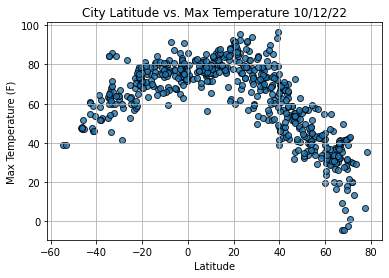

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig1.png")

# Show plot.
plt.show()

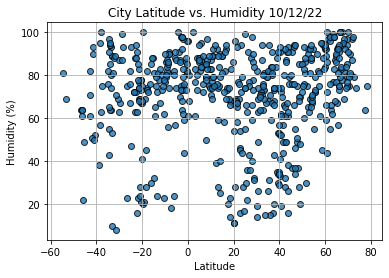

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig2.png")
# Show plot.
plt.show()

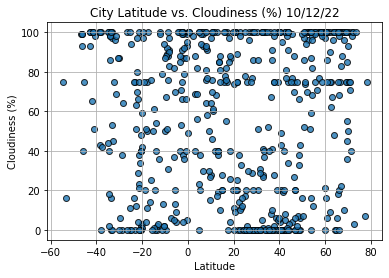

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig3.png")
# Show plot.
plt.show()

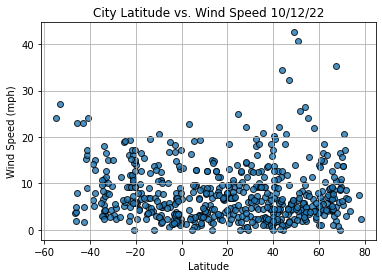

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather-data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()